<h2><center>Approximating invariants $(I_2,U_1,I_3,V_1)$ of the unit disk $D$ by the number of intersection points in the domain produced by random lines</center></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
import random

import seaborn as sns
import scipy.stats as stats

from tqdm import tqdm
from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

# enabling autocomplete
%config Completer.use_jedi = False

In [2]:
def line_intersection(line1, line2):
    """ 
    Finds the intersection point of two lines.
    
    Parameters
    ----------
    line1 : list
        List of two points defining the first line.
    
    line2 : list
        List of two points defining the second line. 
        
    Returns
    -------
    A tuple giving the intersection point of the two lines.
    """
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [3]:
def plot_random_lines(n): 
    """ 
    Generates n random lines intersecting the unit disk D and produces a corresponding plot. 
    The function also prints the number of intersection points in D produced by the random lines.
    
    Parameters
    ----------
    n : int
       Number of random lines.
    """
    plt.figure(figsize=(7,7))

    circle = plt.Circle((0,0), 1, fc='white', ec='black')
    plt.gca().add_patch(circle)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.plot(0,0,'ro') 

    ###############################################
    # generating n random lines
    lines = []

    for _ in range(n):
        phi = random.uniform(0,2*math.pi)
        p = random.uniform(0,1)

        x1 = -1.5
        x2 = 1.5
        y1 = (p + 1.5 * math.cos(phi))/math.sin(phi)
        y2 = (p - 1.5 * math.cos(phi))/math.sin(phi)

        if y1 < -1.5:
            y1 = -1.5
            x1 = (p + 1.5 * math.sin(phi))/math.cos(phi)
        elif y1 > 1.5:
            y1 = 1.5
            x1 = (p - 1.5 * math.sin(phi))/math.cos(phi)

        if y2 < -1.5:
            y2 = -1.5
            x2 = (p + 1.5 * math.sin(phi))/math.cos(phi)
        elif y2 > 1.5:
            y2 = 1.5
            x2 = (p - 1.5 * math.sin(phi))/math.cos(phi)

        lines.append([(x1,y1),(x2,y2)])

        line = plt.Line2D((x1, x2), (y1, y2), lw=1.5)
        plt.gca().add_line(line)
    ###############################################

    n_intersections = 0

    for i in range(n):
        for j in range(i+1,n):
            x,y = line_intersection(lines[i],lines[j])
            if x**2 + y**2 <= 1:
                n_intersections+=1

    print('Number of intersections inside D = {}'.format(n_intersections))

    plt.text(-0.5, -0.75, '$D$', fontsize=20,  color='black')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.show()

### Simulations for n=3 random lines

Number of intersections inside D = 1


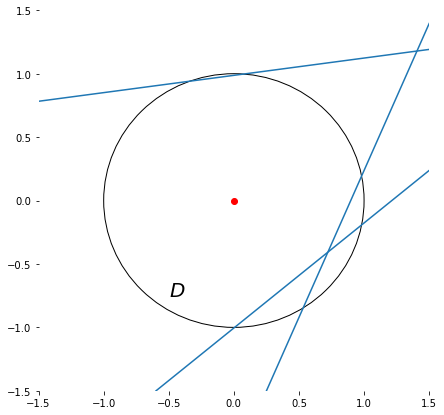

In [4]:
plot_random_lines(n=3)

In [5]:
n_exp = 500
n_trial = 10000

RESULTS_n3 = []

random.seed(42) # fixing seed to have reproducible results
for trial in tqdm(range(n_exp)):
    
    trial_res = defaultdict(int)
    for _ in range(n_trial):
        ###############################################
        # generating random lines
        n = 3
        lines = []
        for _ in range(n):
            phi = random.uniform(0,2*math.pi)
            p = random.uniform(0,1)

            x1 = -1
            x2 = 1
            y1 = (p + 1 * math.cos(phi))/math.sin(phi)
            y2 = (p - 1 * math.cos(phi))/math.sin(phi)
            lines.append([(x1,y1),(x2,y2)])
        ###############################################
        n_intersections = 0
        for i in range(n):
            for j in range(i+1,n):
                x,y = line_intersection(lines[i],lines[j])
                if x**2 + y**2 <= 1:
                    n_intersections+=1
        trial_res[n_intersections]+=1
    
    RESULTS_n3.append(trial_res)

100%|██████████| 500/500 [01:16<00:00,  6.57it/s]


In [6]:
# computing empirical probabilities 
p30 = np.array([e[0]/n_trial for e in RESULTS_n3]).mean()
p31 = np.array([e[1]/n_trial for e in RESULTS_n3]).mean()
p32 = np.array([e[2]/n_trial for e in RESULTS_n3]).mean()
p33 = np.array([e[3]/n_trial for e in RESULTS_n3]).mean()

print(p30,p31,p32,p33)

0.15509179999999997 0.34469219999999995 0.345116 0.15510000000000002


We are now ready to approximate $I_{2}$ through the following formula:
$$I_{2} = \frac{L^3}{12}(p_{32} + 3p_{33})$$

In [7]:
L = 2*math.pi #fixing unit measure
I_2 = (L**3)/12 * (p32 + 3*p33)

print('Empirical value of I_2 = {}'.format(I_2))
print('Exact value of I_2 = {}'.format(16/3*math.pi))

Empirical value of I_2 = 16.751988481427905
Exact value of I_2 = 16.755160819145562


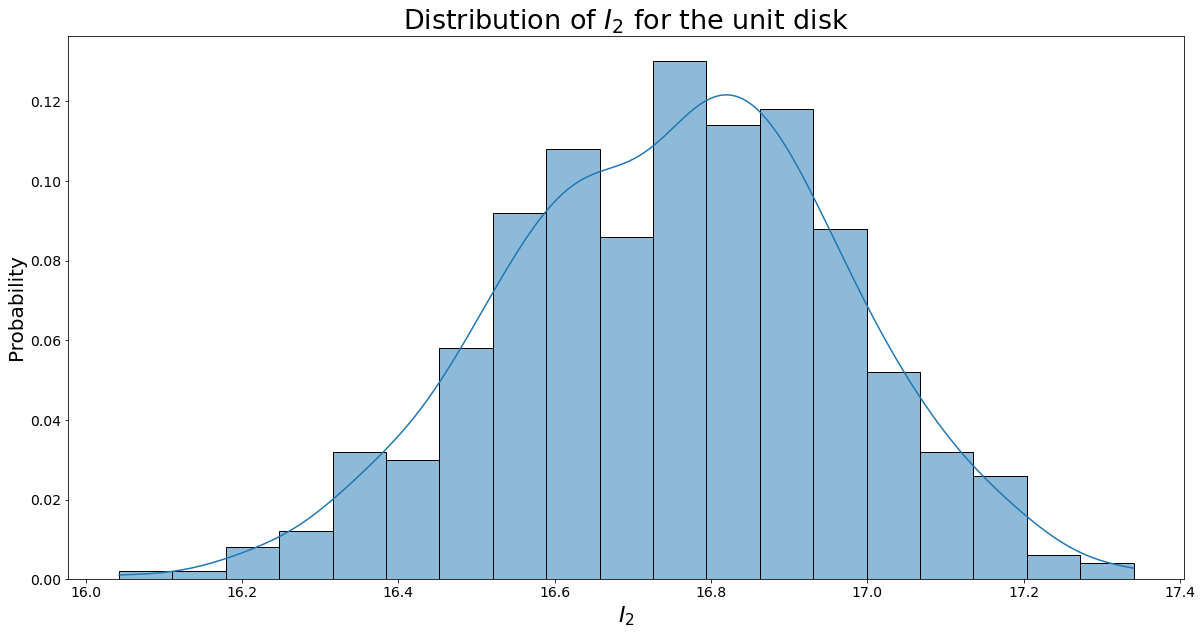

In [8]:
dist_I_2 = []

for i in range(n_exp):
    tmp_p32=RESULTS_n3[i][2]/n_trial
    tmp_p33=RESULTS_n3[i][3]/n_trial
    
    tmp_I_2 = (L**3)/12 * (tmp_p32 + 3*tmp_p33)
    dist_I_2.append(tmp_I_2)
    
plt.figure(figsize=(20, 10))
sns.histplot(dist_I_2,kde=True,stat='probability')

plt.title('Distribution of $I_{2}$ for the unit disk',fontsize=27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$I_{2}$',fontsize=22)
plt.ylabel('Probability',fontsize=20)
plt.show()

In [9]:
print('Standard deviation = {}'.format(np.std(dist_I_2)))

Standard deviation = 0.21518904451894097


Similarly, we can approximate $U_{1}$ through the following formula:
$$U_{1} = \frac{L^3}{3}(2p_{32} + 3p_{33})$$

In [10]:
U_1 = (L**3)/3 * (2*p32 + 3*p33)

print('Empirical value of U_1 = {}'.format(U_1))

Empirical value of U_1 = 95.54331974650722


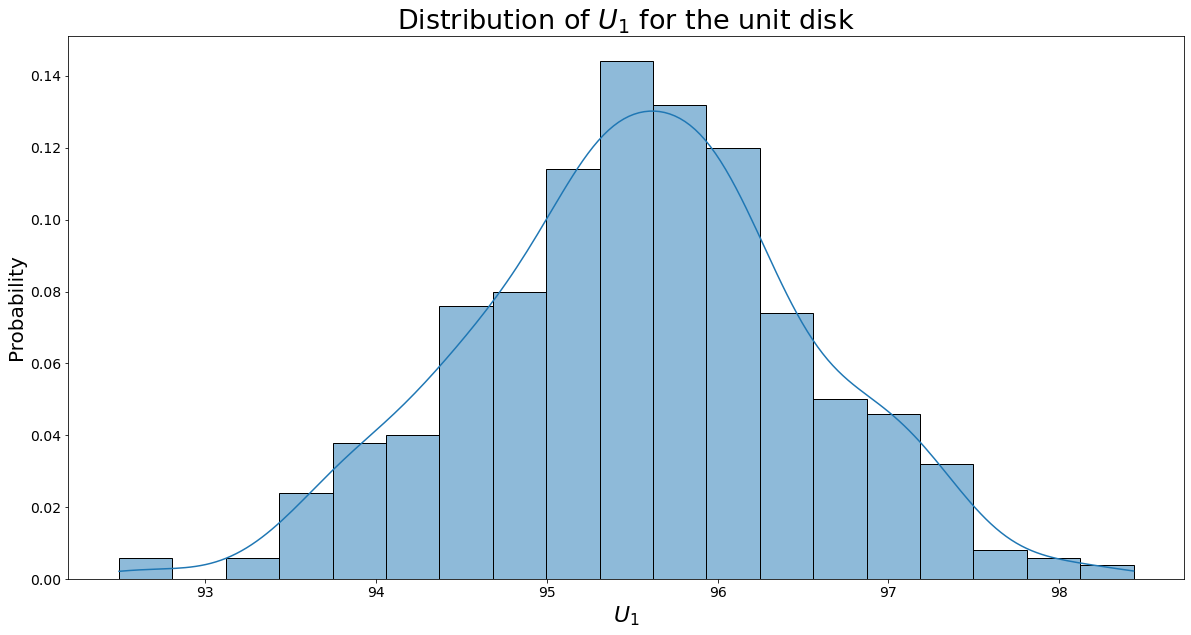

In [11]:
dist_U_1 = []

for i in range(n_exp):
    tmp_p32=RESULTS_n3[i][2]/n_trial
    tmp_p33=RESULTS_n3[i][3]/n_trial
    
    tmp_U_1 = (L**3)/3 * (2*tmp_p32 + 3*tmp_p33)
    dist_U_1.append(tmp_U_1)
    
plt.figure(figsize=(20, 10))
sns.histplot(dist_U_1,kde=True,stat='probability')

plt.title('Distribution of $U_{1}$ for the unit disk',fontsize=27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$U_{1}$',fontsize=22)
plt.ylabel('Probability',fontsize=20)
plt.show()

In [12]:
print('Standard deviation = {}'.format(np.std(dist_U_1)))

Standard deviation = 0.9761415737573327


### Simulations for n=4 random lines

Number of intersections inside D = 6


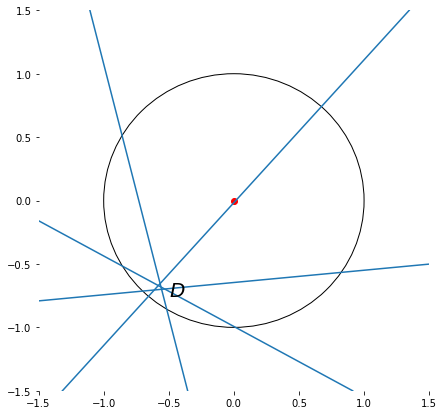

In [13]:
plot_random_lines(n=4)

In [14]:
n_exp = 500
n_trial = 10000

RESULTS_n4 = []

RES_p43_3 = []
RES_p43_2 = []
RES_p43_1 = []

random.seed(42) # fixing seed to have reproducible results
for trial in tqdm(range(n_exp)):
    
    count_43_3 = 0
    count_43_2 = 0
    count_43_1 = 0
    trial_res = defaultdict(int)
    for _ in range(n_trial):
        ###############################################
        # generating random lines
        n = 4
        lines = []
        for _ in range(n):
            phi = random.uniform(0,2*math.pi)
            p = random.uniform(0,1)

            x1 = -1
            x2 = 1
            y1 = (p + 1 * math.cos(phi))/math.sin(phi)
            y2 = (p - 1 * math.cos(phi))/math.sin(phi)
            lines.append([(x1,y1),(x2,y2)])
        ###############################################
        
        d = {k:0 for k in range(1,n+1)}
        
        n_intersections = 0
        for i in range(n):
            for j in range(i+1,n):
                x,y = line_intersection(lines[i],lines[j])
                if x**2 + y**2 <= 1:
                    n_intersections+=1
                    d[i+1]+=1
                    d[j+1]+=1
        
        if sorted(d.values())==[1,1,1,3]:
            count_43_3+=1
        elif sorted(d.values())==[1,1,2,2]:
            count_43_2+=1
        elif sorted(d.values())==[0,2,2,2]:
            count_43_1+=1

        trial_res[n_intersections]+=1
    
    RESULTS_n4.append(trial_res)
    RES_p43_3.append(count_43_3)
    RES_p43_2.append(count_43_2)
    RES_p43_1.append(count_43_1)

100%|██████████| 500/500 [02:22<00:00,  3.52it/s]


In [15]:
# computing empirical probabilities 
p40 = np.array([e[0]/n_trial for e in RESULTS_n4]).mean()
p41 = np.array([e[1]/n_trial for e in RESULTS_n4]).mean()
p42 = np.array([e[2]/n_trial for e in RESULTS_n4]).mean()
p43 = np.array([e[3]/n_trial for e in RESULTS_n4]).mean()
p44 = np.array([e[4]/n_trial for e in RESULTS_n4]).mean()
p45 = np.array([e[5]/n_trial for e in RESULTS_n4]).mean()
p46 = np.array([e[6]/n_trial for e in RESULTS_n4]).mean()

p43_3 = np.array([e/n_trial for e in RES_p43_3]).mean()
p43_2 = np.array([e/n_trial for e in RES_p43_2]).mean()
p43_1 = np.array([e/n_trial for e in RES_p43_1]).mean()

print(p43_3,p43_2,p43_1)

0.0693416 0.11345259999999999 0.08265120000000001


We are now ready to approximate $I_{3}$ through the following formula:
$$I_{3} = \frac{L^4}{32}(4p_{33} + p_{43}^{(3)} - p_{43}^{(1)})$$

In [16]:
I_3 = (L**4)/32 * (4*p33 + p43_3 - p43_1)

print('Empirical value of I_3 = {}'.format(I_3))
print('Exact value of I_3 = {}'.format(3*np.pi**2))

Empirical value of I_3 = 29.568062019734473
Exact value of I_3 = 29.608813203268074


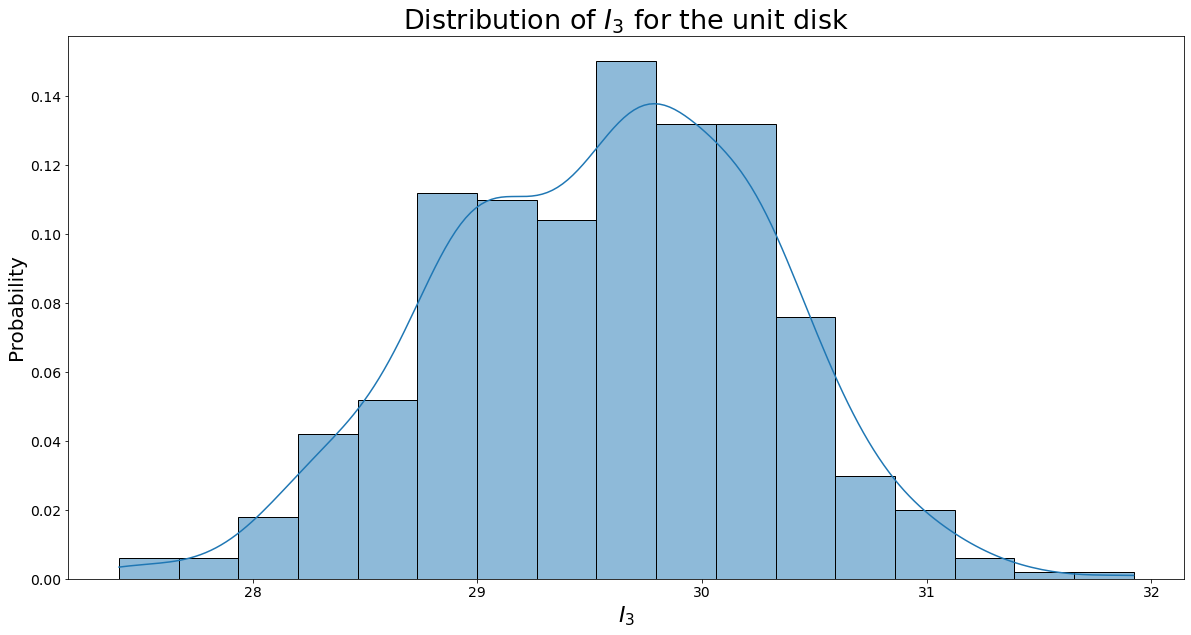

In [17]:
dist_I_3 = []

for i in range(n_exp):
    tmp_p33=RESULTS_n3[i][3]/n_trial
    tmp_p43_3=RES_p43_3[i]/n_trial
    tmp_p43_1=RES_p43_1[i]/n_trial
    
    tmp_I_3 = (L**4)/32 * (4*tmp_p33 + tmp_p43_3 - tmp_p43_1)
    dist_I_3.append(tmp_I_3)
    
plt.figure(figsize=(20, 10))
sns.histplot(dist_I_3,kde=True,stat='probability')

plt.title('Distribution of $I_{3}$ for the unit disk',fontsize=27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$I_{3}$',fontsize=22)
plt.ylabel('Probability',fontsize=20)
plt.show()

Similarly, we can approximate $V_{1}$ through the following formula:
$$V_{1} = L^4(p_{33} - \frac{1}{4}p_{43}^{(1)})$$

In [18]:
V_1 = (L**4) * (p33 - 1/4*p43_1)

print('Empirical value of V_1 = {}'.format(V_1))

Empirical value of V_1 = 209.52648725050224


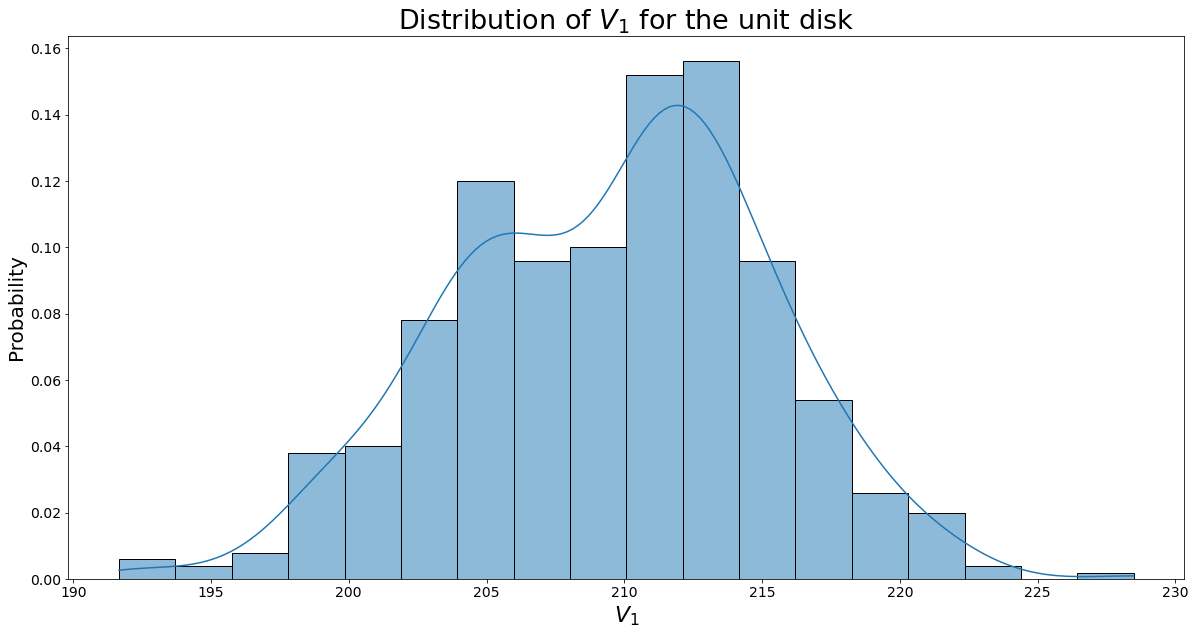

In [19]:
dist_V_1 = []

for i in range(n_exp):
    tmp_p33=RESULTS_n3[i][3]/n_trial
    tmp_p43_1=RES_p43_1[i]/n_trial
    
    tmp_V_1 = (L**4) * (tmp_p33 - 1/4*tmp_p43_1)
    dist_V_1.append(tmp_V_1)
    
plt.figure(figsize=(20, 10))
sns.histplot(dist_V_1,kde=True,stat='probability')

plt.title('Distribution of $V_{1}$ for the unit disk',fontsize=27)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$V_{1}$',fontsize=22)
plt.ylabel('Probability',fontsize=20)
plt.show()